In [3]:
import basefunction.assembly as assembly
import time as time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

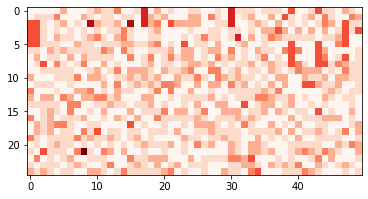

In [4]:

# list below defines membership of assemblies
# example below creates three assemblies: 
#              assembly 0 = neurons 0, 1 and 2
#              assembly 1 = neurons 2, 3, 4 and 5
#              assembly 2 = neurons 0, 5, 6 and 7
membership = [[0,1,2],\
              [2,3,4,5],\
              [0,5,6,7,8]]

# array below defines the activation rate of each assembly (activation/bins)
# in this example, activations of assemblies 0,1 and 2 are respectively 0.06, 0.05, 0.04
# i.e., assemblies will be active in 6, 5 and 4% of the total number of bins
actrate = [.06,.05,.04]

# array below defines the activation strength of each assembly 
# in this example, neurons of assembly 0 will be fire 4 times their 
#                                             baseline rate in activation bins
actstrength = [4.,3.,3.5]

# this creates an object with assembly definitions
assemblies = assembly.toyassemblies(membership = membership, \
                                    actrate = actrate, \
                                    actstrength=actstrength)

# this creates an activity matrix in which neurons have Poisson background rate
# pass assembly object above as first input
nneurons = 25 # total number of neurons to in the simulation
nbins = 10000 # total number of time bins
rate = 1. # this defines the mean baseline rate of all neurons
actmat = assembly.toyExample(assemblies, nneurons = nneurons,nbins=nbins, rate = rate)

plt.imshow(actmat[:,0:50],cmap='Reds') # shows first 50 time bins of simulation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove t

Text(0.5, 0.98, 'Using circular shuffling, elapsed time: 8.986 seconds')

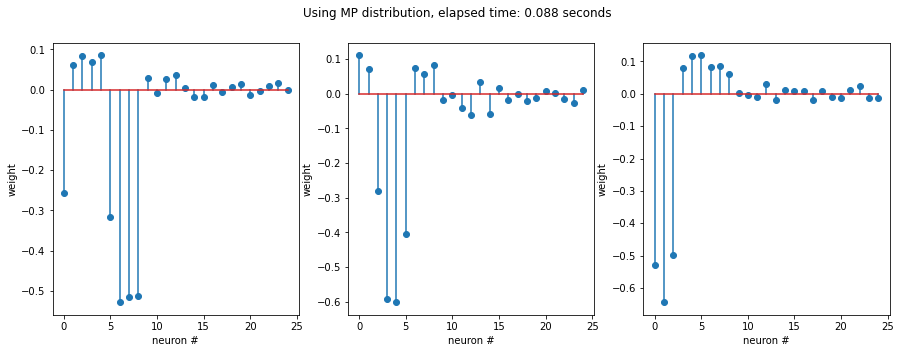

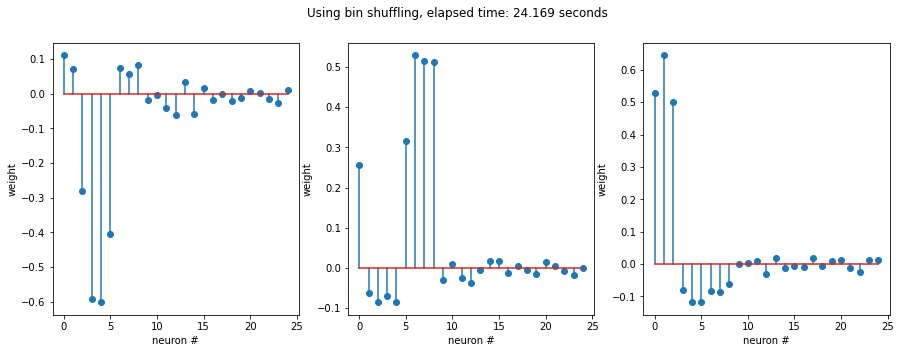

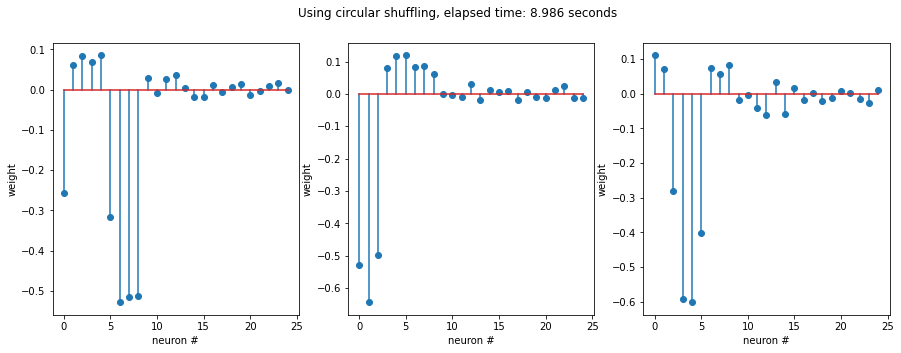

In [5]:

'''
INPUTS

    actmat:     activity matrix - numpy array (neurons, time bins) 
    
    nullhyp:    defines how to generate statistical threshold for assembly detection.
                    'bin' - bin shuffling, will shuffle time bins of 
                                                            each neuron independently
                    'circ' - circular shuffling, will shift time bins 
                                                            of each neuron independently
                                                obs: mantains (virtually) autocorrelations
                    'mp' - Marcenko-Pastur distribution - analytical threshold
                    
    nshu:       defines how many shuffling controls will be done (n/a if nullhyp is 'mp')
    
    percentile: defines which percentile to be used use when shuffling methods are employed.
                                                                (n/a if nullhyp is 'mp')
                                                                 
    tracywidow: determines if Tracy-Widom is used. See Peyrache et al 2010.
                                            (n/a if nullhyp is NOT 'mp')
                                            
OUTPUTS
    
    patterns:     co-activation patterns (assemblies) - numpy array (assemblies, neurons)
    significance: object containing general information about significance tests 
    zactmat:      returns z-scored actmat

'''

# using Marcenko-Pastur function as null distribution
t0 = time.time()
patterns,significance,zactmat = assembly.runPatterns(actmat,nullhyp='mp')
tf = np.round(1000*(time.time()-t0))/1000

plt.figure(figsize=(15,5))
for (pi,pattern) in enumerate(patterns):
        plt.subplot(1,len(patterns),1+pi)
        plt.stem(pattern)
        plt.xlabel('neuron #')
        plt.ylabel('weight')
plt.suptitle('Using MP distribution, elapsed time: '+str(tf)+' seconds')

# using simple bin shuffling for computing null distribution
nshu = 1000 # defines number of controls to run 
#                       (i.e., number of elements in null hypothesis distribution)
percentile = 99.5 # defines which percentile of control distribution 
#                                           will be used as significance threshold
t0 = time.time()
patterns,significance,zactmat = assembly.runPatterns(actmat,\
                                                     nullhyp='bin',\
                                                     nshu=nshu,\
                                                     percentile=percentile)
tf = np.round(1000*(time.time()-t0))/1000

plt.figure(figsize=(15,5))
for (pi,pattern) in enumerate(patterns):
        plt.subplot(1,len(patterns),1+pi)
        plt.stem(pattern)
        plt.xlabel('neuron #')
        plt.ylabel('weight')
plt.suptitle('Using bin shuffling, elapsed time: '+str(tf)+' seconds')

# using circular shuffling for computing null distribution 
                    # (MUST USE IT IF YOU HAVE STRONG AUTOCORRELATIONS)
    
nshu = 1000 # defines number of controls to run 
#                     (i.e., number of elements in null hypothesis distribution)

percentile = 99.5 # defines which percentile of control distribution
#                                        will be used as significance threshold

t0 = time.time()
patterns,significance,zactmat = assembly.runPatterns(actmat,\
                                                     nullhyp='circ',\
                                                     nshu=nshu,\
                                                     percentile=percentile)
tf = np.round(1000*(time.time()-t0))/1000

plt.figure(figsize=(15,5))
for (pi,pattern) in enumerate(patterns):
        plt.subplot(1,len(patterns),1+pi)
        plt.stem(pattern)
        plt.xlabel('neuron #')
        plt.ylabel('weight')
plt.suptitle('Using circular shuffling, elapsed time: '+str(tf)+' seconds')

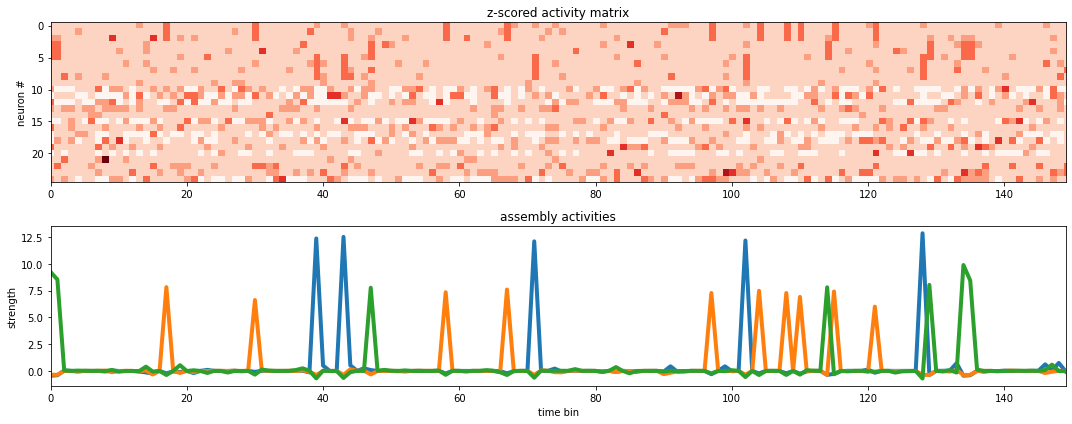

In [6]:
# finally, you can use the function below to compute assembly activity

assemblyAct = assembly.computeAssemblyActivity(patterns,zactmat)
# note that the zactmat could be from another session 
#          (like a sleep session for "replay" analysis)


plt.figure(figsize=(15,6))
s1 = plt.subplot(211)
plt.imshow(zactmat[:,0:150],cmap='Reds',interpolation='nearest',aspect='auto')
plt.title('z-scored activity matrix')
plt.ylabel('neuron #')

plt.subplot(212,sharex=s1)
plt.plot(assemblyAct[:,0:150].T,linewidth=4)
plt.title('assembly activities')
plt.xlim(0,149)
plt.xlabel('time bin')
plt.ylabel('strength')
plt.tight_layout()